In [1]:
import torch
from network import Network
from layers import Dense, Activation
import utils

Using TensorFlow backend.


In [2]:
utils.use_gpu()

Device currently used: GeForce RTX 2080 Ti


In [3]:
X_train, y_train, X_test, y_test = utils.load_cifar10()

CIFAR-10 dataset has been loaded...
Size of the training set: (50000, 3072), (50000, 10)
Size of the test set: (10000, 3072), (10000, 10)


In [4]:
net = Network()
net.add(Dense(X_train.shape[1], 1024))
net.add(Activation('sigmoid'))
net.add(Dense(1024, 512))
net.add(Activation('sigmoid'))
net.add(Dense(512, 256))
net.add(Activation('sigmoid'))
net.add(Dense(256, 10))
net.add(Activation('softmax'))

In [5]:
net.set_loss('softmax_crossentropy')
train_costs, train_accs, test_costs, test_accs = net.fit(X_train, y_train, test_data=(X_test, y_test),
                                                         batch_size=64,
                                                         num_epochs=300,
                                                         learning_rate=0.05,
                                                         momentum=0.9,
                                                         keep_prob=0.9)

=============== Epoch 10 ===============
Train: cost = 2.0412, accuracy = 25.70%
Test: cost = 1.9896, accuracy = 25.76%
=============== Epoch 20 ===============
Train: cost = 1.9492, accuracy = 27.71%
Test: cost = 1.9294, accuracy = 27.99%
=============== Epoch 30 ===============
Train: cost = 1.9039, accuracy = 31.19%
Test: cost = 1.8703, accuracy = 31.15%
=============== Epoch 40 ===============
Train: cost = 1.8685, accuracy = 31.00%
Test: cost = 1.8461, accuracy = 30.89%
=============== Epoch 50 ===============
Train: cost = 1.8394, accuracy = 35.41%
Test: cost = 1.7859, accuracy = 35.82%
=============== Epoch 60 ===============
Train: cost = 1.8134, accuracy = 34.84%
Test: cost = 1.7854, accuracy = 34.83%
=============== Epoch 70 ===============
Train: cost = 1.7904, accuracy = 36.98%
Test: cost = 1.7517, accuracy = 37.08%
=============== Epoch 80 ===============
Train: cost = 1.7715, accuracy = 37.65%
Test: cost = 1.7228, accuracy = 37.47%
=============== Epoch 90 ===============

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

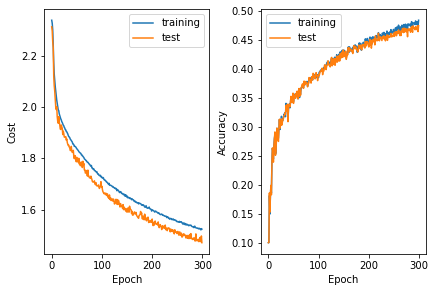

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# Plot 1: cost-epoch
ax1.plot(train_costs)
ax1.plot(test_costs)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Cost')
ax1.legend(['training', 'test'])
# Plot 2: accuracy-epoch
ax2.plot(train_accs)
ax2.plot(test_accs)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(['training', 'test'])

fig.tight_layout(pad=0.5)
plt.show()

In [8]:
import csv

In [9]:
def output_log(train_costs, train_accs, test_costs, test_accs):
    with open('MLP.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        for epoch in range(len(train_costs)):
            writer.writerow([epoch + 1, train_costs[epoch], train_accs[epoch], test_costs[epoch], test_accs[epoch]])

In [10]:
output_log(train_costs, train_accs, test_costs, test_accs)